In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
%matplotlib inline
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train:",len(x_img_train))
print("test:",len(x_img_test))

train: 50000
test: 10000


In [6]:
y_label_train.shape

(50000, 1)

In [7]:
y_label_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [8]:
def plot_images_lables_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

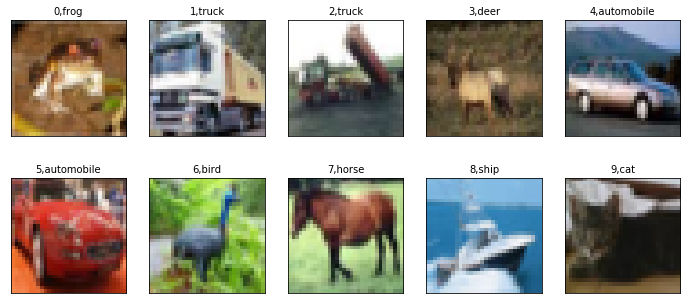

In [9]:
plot_images_lables_prediction(x_img_train,y_label_train,[],0)

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [11]:
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [12]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [13]:
y_label_train.shape

(50000, 1)

In [14]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)

In [16]:
y_label_train_OneHot.shape

(50000, 10)

In [17]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
model=Sequential()

In [19]:
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dropout(0.25))

In [27]:
model.add(Dense(1024,activation='relu'))

In [28]:
model.add(Dropout(0.25))

In [29]:
model.add(Dense(10,activation='softmax'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=16,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 98s - loss: 1.4269 - acc: 0.4850 - val_loss: 1.2074 - val_acc: 0.5860
Epoch 2/10
 - 80s - loss: 1.0958 - acc: 0.6131 - val_loss: 1.0759 - val_acc: 0.6320
Epoch 3/10
 - 79s - loss: 0.9351 - acc: 0.6725 - val_loss: 0.9728 - val_acc: 0.6648
Epoch 4/10
 - 79s - loss: 0.8199 - acc: 0.7094 - val_loss: 0.9059 - val_acc: 0.7038
Epoch 5/10
 - 77s - loss: 0.7189 - acc: 0.7475 - val_loss: 0.8889 - val_acc: 0.7012
Epoch 6/10


In [37]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()

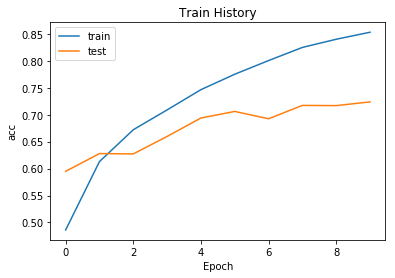

In [38]:
show_train_history(train_history,'acc','val_acc')

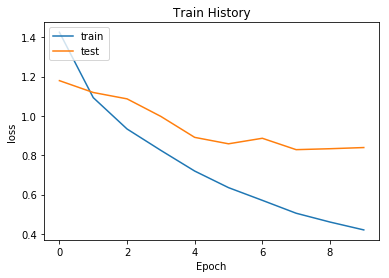

In [40]:
show_train_history(train_history,'loss','val_loss')

In [41]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

0.7178

In [42]:
prediction=model.predict_classes(x_img_test_normalize)

In [43]:
prediction[:10]

array([3, 8, 0, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

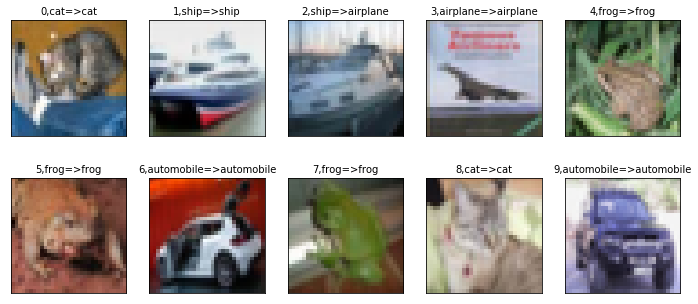

In [44]:
plot_images_lables_prediction(x_img_test,y_label_test,prediction,0,10)

In [45]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [46]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
         'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


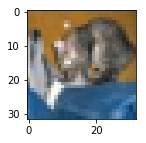

airplane Probability:0.002133266
automobile Probability:0.000302287
bird Probability:0.009966238
cat Probability:0.437178731
deer Probability:0.015267442
dog Probability:0.422747880
frog Probability:0.078252152
horse Probability:0.008146069
ship Probability:0.024629941
truck Probability:0.001376067


In [47]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


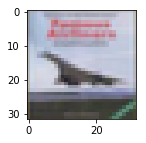

airplane Probability:0.706533909
automobile Probability:0.001985898
bird Probability:0.068329275
cat Probability:0.005508133
deer Probability:0.045625199
dog Probability:0.001227767
frog Probability:0.000189979
horse Probability:0.039145082
ship Probability:0.131126970
truck Probability:0.000327687


In [48]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [49]:
prediction.shape

(10000,)

In [50]:
y_label_test.shape

(10000, 1)

In [51]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [52]:
y_label_test.shape

(10000, 1)

In [53]:
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,752,19,65,21,15,12,16,14,66,20
1,19,831,13,10,7,10,12,3,31,64
2,60,2,615,32,122,59,86,12,9,3
3,21,8,74,409,108,196,129,35,11,9
4,14,1,73,29,760,33,51,30,8,1
5,8,0,51,107,81,647,61,38,5,2
6,2,3,22,30,45,25,865,2,5,1
7,15,0,30,29,107,66,13,733,4,3
8,50,25,31,16,11,5,15,2,834,11


In [54]:
model=Sequential()
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [55]:
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [56]:
model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [57]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 695us/step - loss: 1.8902 - acc: 0.2920 - val_loss: 1.9517 - val_acc: 0.2942
Epoch 2/10
40000/40000 [==============================] - 25s 624us/step - loss: 1.4833 - acc: 0.4535 - val_loss: 1.6087 - val_acc: 0.4329
Epoch 3/10
40000/40000 [==============================] - 25s 625us/step - loss: 1.2894 - acc: 0.5339 - val_loss: 1.3539 - val_acc: 0.5182
Epoch 4/10
40000/40000 [==============================] - 25s 622us/step - loss: 1.1554 - acc: 0.5820 - val_loss: 1.1596 - val_acc: 0.5905
Epoch 5/10
40000/40000 [==============================] - 25s 628us/step - loss: 1.0489 - acc: 0.6201 - val_loss: 1.0783 - val_acc: 0.6222
Epoch 6/10
40000/40000 [==============================] - 25s 626us/step - loss: 0.9474 - acc: 0.6646 - val_loss: 1.0218 - val_acc: 0.6500
Epoch 7/10
40000/40000 [==============================] - 25s 626us/step - loss: 0.8793 - acc: 0.6880 - val_loss: 0.

In [59]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

0.7175

In [60]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=1,batch_size=300,verbose=1)
model.save_weights("SaveModel/cifarCnnModel.h5")
print("Saved model to disk")

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 25s 625us/step - loss: 0.6379 - acc: 0.7752 - val_loss: 0.7842 - val_acc: 0.7330


OSError: Unable to create file (unable to open file: name = 'SaveModel/cifarCnnModel.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [61]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("加载模型成功！继续训练模型")
except:
    print("加载模型失败！开始训练一个新的模型")

加载模型失败！开始训练一个新的模型
